In [1]:
#Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
#data is downloaded from Kaggle
df = pd.read_csv('Stock_data/Intel_stock.csv')

In [3]:
df

Open       High        Low      Close  Adj Close    Volume
0     36.610001  36.930000  36.270000  36.599998  32.440598  20196500
1     36.709999  36.770000  36.340000  36.410000  32.272194  15915700
2     36.450001  36.720001  36.310001  36.349998  32.219013  13986000
3     36.590000  36.680000  36.189999  36.480000  32.334232  15114000
4     36.480000  36.889999  36.480000  36.610001  32.449463  19461400
...         ...        ...        ...        ...        ...       ...
1002  46.599998  47.090000  46.340000  47.070000  46.199398  11865600
1003  47.189999  47.639999  46.860001  47.070000  46.199398  21269200
1004  47.220001  50.669998  46.490002  49.389999  48.476486  84531400
1005  49.110001  49.189999  48.560001  48.750000  47.848328  37385400
1006  48.750000  50.189999  48.720001  49.820000  48.898537  28576800

[1007 rows x 6 columns]

Plotting heatmap just to see the correlation, and apparently volume is totally not important and others are highly correlated, so can just use any of them. I am using closing price for this project

<AxesSubplot:>

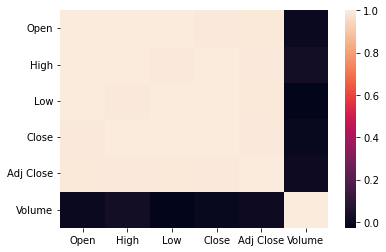

In [4]:
import seaborn as sns
sns.heatmap(df.corr())

In [5]:
df_closing = df['Close']
df_closing.head()

0    36.599998
1    36.410000
2    36.349998
3    36.480000
4    36.610001
Name: Close, dtype: float64

Dividing train and test data

In [6]:
df_train = df_closing[:800].values.reshape(-1, 1)
df_test = df_closing[800:].values.reshape(-1, 1)


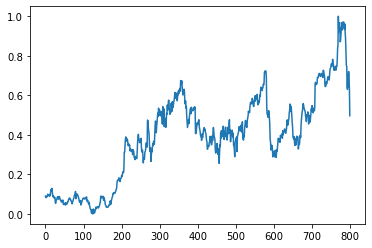

In [7]:
scaler = MinMaxScaler(feature_range= (0,1)) # defining of Scaler
df_train_scaled = scaler.fit_transform(df_train) # applying to Scaler to train

plt.plot(df_train_scaled)
plt.show()

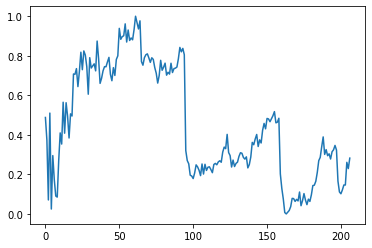

In [8]:
scaler = MinMaxScaler(feature_range= (0,1)) # defining of Scaler
df_test_scaled = scaler.fit_transform(df_test) # applying to Scaler to train

plt.plot(df_test_scaled)
plt.show()

Trying to split the data to train and test

In [9]:
X_train = []
y_train = []
timesteps = 10

for i in range(timesteps, df_train_scaled.shape[0]):
    X_train.append(df_train_scaled[i-timesteps:i,0])
    y_train.append(df_train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  

In [10]:
X_test = []
y_test = []
timesteps = 10

for i in range(timesteps, df_test_scaled.shape[0]):
    X_test.append(df_test_scaled[i-timesteps:i,0])
    y_test.append(df_test_scaled[i,0])

X_test, y_test = np.array(X_test), np.array(y_test)


X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Model 1

SimpleRNN without Dropout

In [11]:
model1 = Sequential()
model1.add(SimpleRNN(10, input_shape = (X_train.shape[1], 1), activation = 'tanh'))


model1.add(Dense(1))
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')
model1.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.3592
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0774
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0468
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0320
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 11/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 12/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 13/100
25/25 [=================

In [12]:
train_predict1=model1.predict(X_train)
test_predict1=model1.predict(X_test)
train_predict1=scaler.inverse_transform(train_predict1)
test_predict1=scaler.inverse_transform(test_predict1)

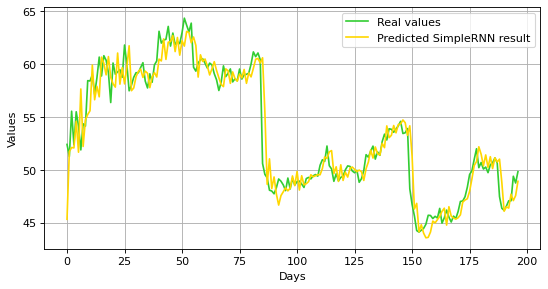

In [13]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df_test[10:],color="LimeGreen",label="Real values")
plt.plot(test_predict1,color="Gold",label="Predicted SimpleRNN result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

Model 2

LSTM without Dropout

In [14]:
model2 = Sequential()
model2.add(LSTM(10, input_shape = (X_train.shape[1], 1), activation = 'tanh'))

model2.add(Dense(1))
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')
model2.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.0821
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0134
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 11/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 12/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 13/100
25/25 [=================

In [15]:
train_predict2=model2.predict(X_train)
test_predict2=model2.predict(X_test)
train_predict2=scaler.inverse_transform(train_predict2)
test_predict2=scaler.inverse_transform(test_predict2)

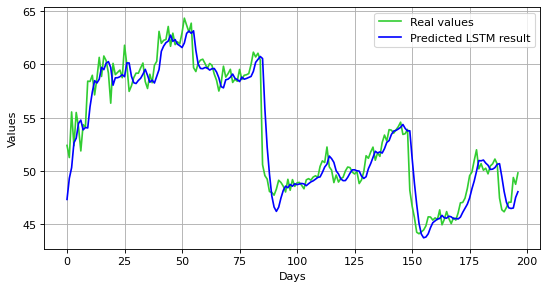

In [16]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df_test[10:],color="LimeGreen",label="Real values")
plt.plot(test_predict2,color="Blue",label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

Model 3

SimpleRNN with Dropout

In [17]:
model3 = Sequential()
model3.add(SimpleRNN(10, input_shape = (X_train.shape[1], 1), activation = 'tanh'))
model3.add(Dropout(0.2))


model3.add(Dense(1))
model3.compile(optimizer = 'adam', loss = 'mean_squared_error')
model3.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3696
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1045
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0570
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0381
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0333
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0247
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0252
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 11/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 12/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 13/100
25/25 [=================

In [18]:
train_predict3=model3.predict(X_train)
test_predict3=model3.predict(X_test)
train_predict3=scaler.inverse_transform(train_predict3)
test_predict3=scaler.inverse_transform(test_predict3)


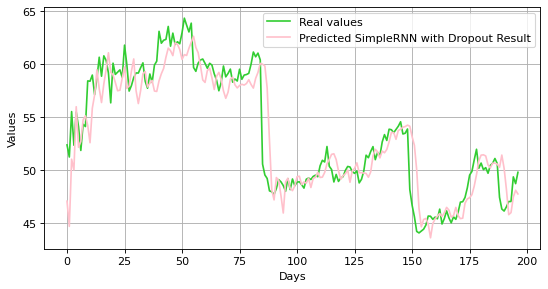

In [19]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df_test[10:],color="LimeGreen",label="Real values")
plt.plot(test_predict3,color="pink",label="Predicted SimpleRNN with Dropout Result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

Model 4

LSTM with Dropout

In [20]:
model4 = Sequential()
model4.add(LSTM(10, input_shape = (X_train.shape[1], 1), activation = 'tanh'))
model4.add(Dropout(0.2))


model4.add(Dense(1))
model4.compile(optimizer = 'adam', loss = 'mean_squared_error')
model4.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.0723
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0194
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0118
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 11/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 12/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 13/100
25/25 [=================

In [21]:
train_predict4=model4.predict(X_train)
test_predict4=model4.predict(X_test)
train_predict4=scaler.inverse_transform(train_predict4)
test_predict4=scaler.inverse_transform(test_predict4)

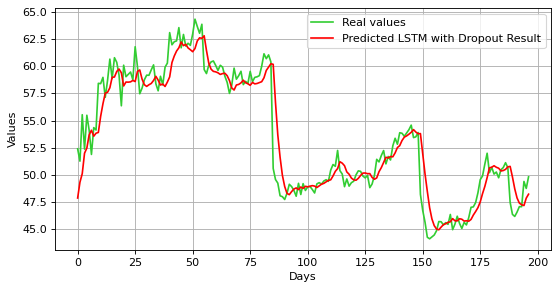

In [22]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df_test[10:],color="LimeGreen",label="Real values")
plt.plot(test_predict4,color="Red",label="Predicted LSTM with Dropout Result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

Combining everything to 1 graph

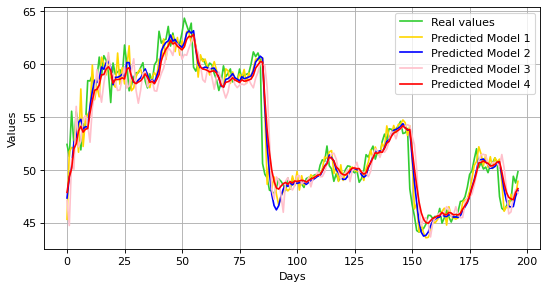

In [23]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df_test[10:],color="LimeGreen",label="Real values")
plt.plot(test_predict1,color="Gold",label="Predicted Model 1")
plt.plot(test_predict2,color="Blue",label="Predicted Model 2")
plt.plot(test_predict3,color="Pink",label="Predicted Model 3")
plt.plot(test_predict4,color="Red",label="Predicted Model 4")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

Conclusion

Seems like SimpleRNN vs LSTM do not give much difference in term of accuracy. and In our case dropout actually reduce the accuracy (a bit underfitting compare to no dropout).. 

Overall, the one best performing is model 1: which is SimpleRNN model without any dropout